In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')


In [4]:
 pd.read_csv('magic04.data')

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [7]:
col = ['Length', 'Width', 'Size', 'Conc', 'Conc1', 'Asym', 'M3Long', 'M3Trans', 'Alpha', 'Dist', 'Class']

In [8]:
df = pd.read_csv('magic04.data', names=col)
df.head()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [17]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")
print(df.info())
print(df.describe())

The data has 19020 rows and 11 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Length   19020 non-null  float64
 1   Width    19020 non-null  float64
 2   Size     19020 non-null  float64
 3   Conc     19020 non-null  float64
 4   Conc1    19020 non-null  float64
 5   Asym     19020 non-null  float64
 6   M3Long   19020 non-null  float64
 7   M3Trans  19020 non-null  float64
 8   Alpha    19020 non-null  float64
 9   Dist     19020 non-null  float64
 10  Class    19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None
             Length         Width          Size          Conc         Conc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813  

In [18]:
df.isnull().sum()

,0
Length,0
Width,0
Size,0
Conc,0
Conc1,0
Asym,0
M3Long,0
M3Trans,0
Alpha,0
Dist,0


In [21]:
df.Class = (df['Class'] == 'g').astype('int')

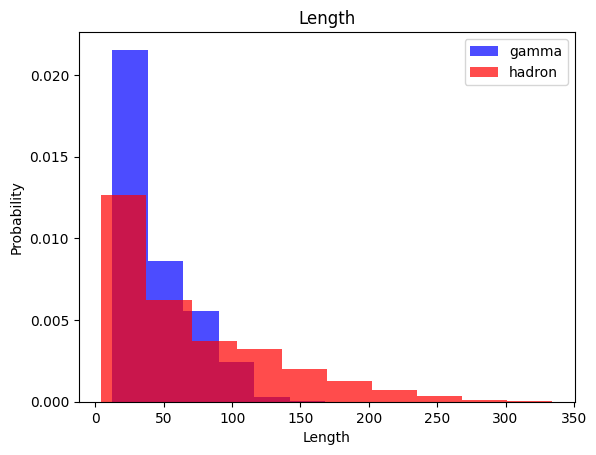

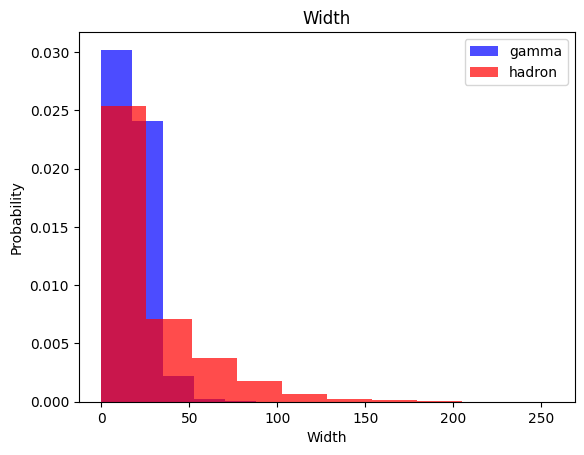

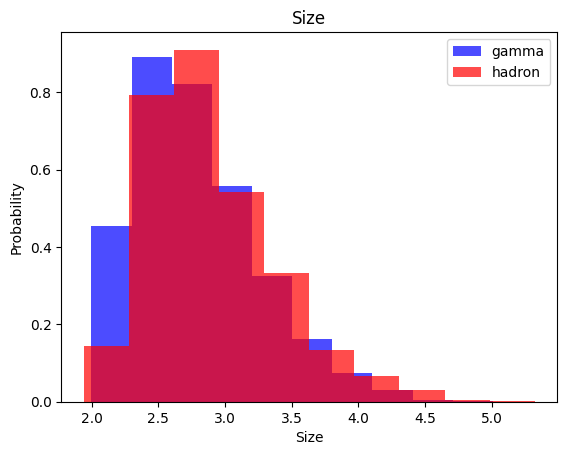

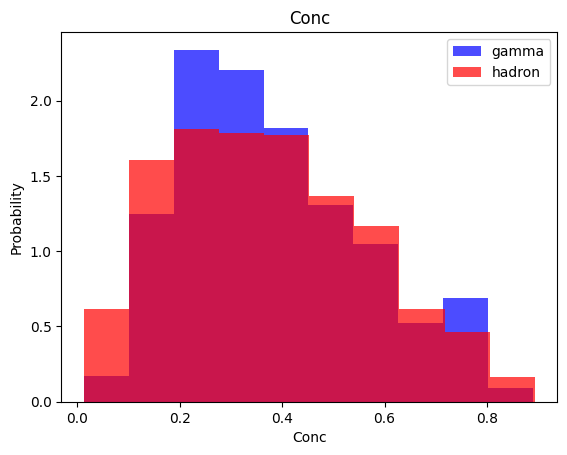

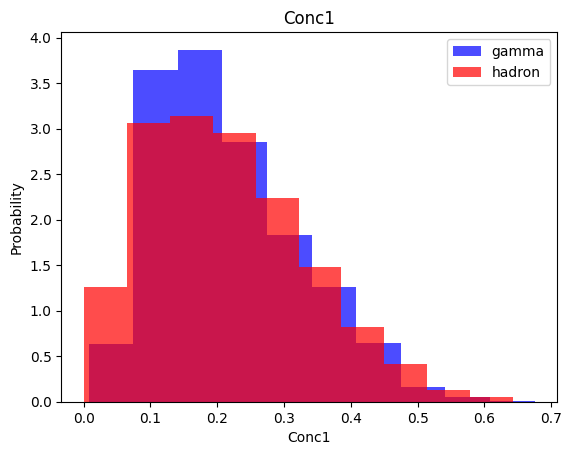

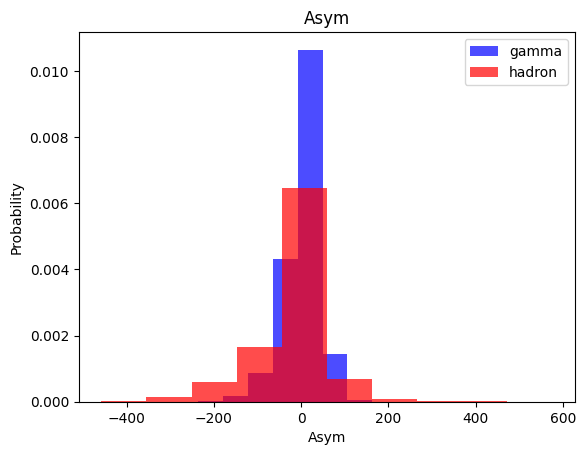

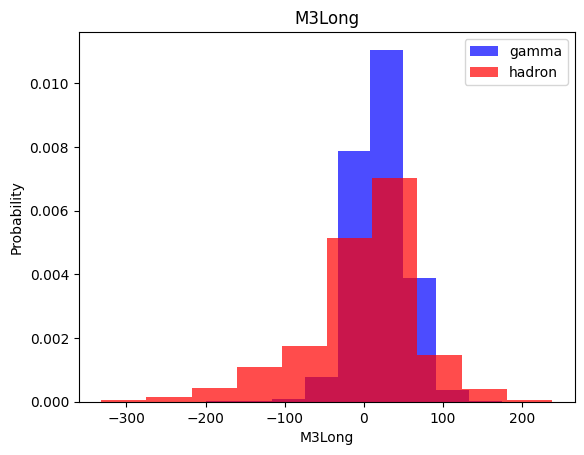

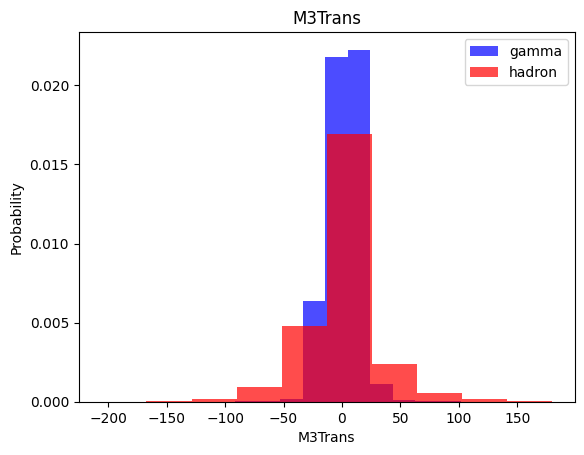

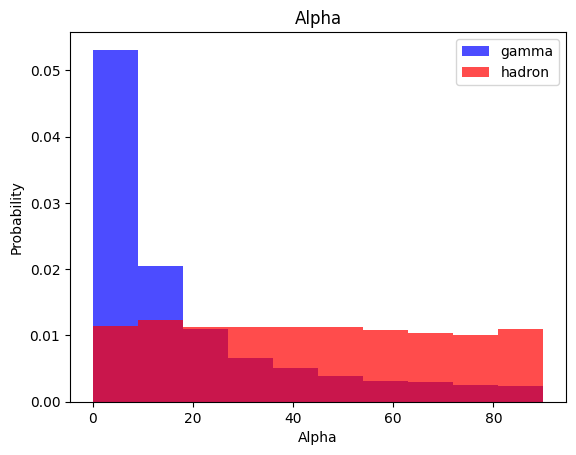

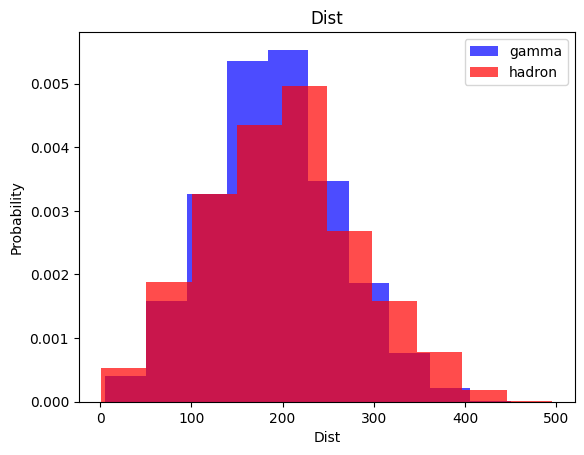

In [25]:
for label in col[:-1]:
  plt.hist(df[df['Class'] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7 , density = True)
  plt.hist(df[df['Class'] == 0][label], color = 'red', label = 'hadron', alpha = 0.7 , density= True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [27]:
#Train, valid, test

In [29]:
Train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [36]:
def Standard_Scaler(DataFrame, oversample = False):
  X = DataFrame[DataFrame.columns[:-1]]
  y = DataFrame[DataFrame.columns[-1]]

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [45]:
train, X_train, y_train = Standard_Scaler(Train, oversample = True)
valid, X_valid, y_valid = Standard_Scaler(valid, oversample = False)
test, X_test, y_test = Standard_Scaler(test, oversample = False)

# kNN

In [47]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1324
           1       0.86      0.86      0.86      2480

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

In [54]:
Naive_model = GaussianNB()
Naive_model.fit(X_train, y_train)
y_pred = Naive_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.51      1324
           1       0.74      0.89      0.81      2480

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [57]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1324
           1       0.84      0.82      0.83      2480

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



# SVM

In [58]:
from sklearn.svm import SVC

In [60]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1324
           1       0.89      0.90      0.89      2480

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [61]:
import tensorflow as tf

In [74]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
        nn_model = tf.keras.Sequential([
            tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10, )),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(num_nodes, activation = 'relu'),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(1, activation = 'sigmoid')
        ])

        nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                        metrics = ['accuracy'])

        history = nn_model.fit(
                          X_train, y_train,
                          epochs = 100,
                          batch_size = batch_size,
                          validation_split = 0.2,
                          verbose = 0
                           )
        return nn_model, history

In [83]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Enoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  ax1.grid(True)
  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Enoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  plt.show()

The number of nodes is 16, dropout probability is 0 The learning rate is 0.05 batch size 32


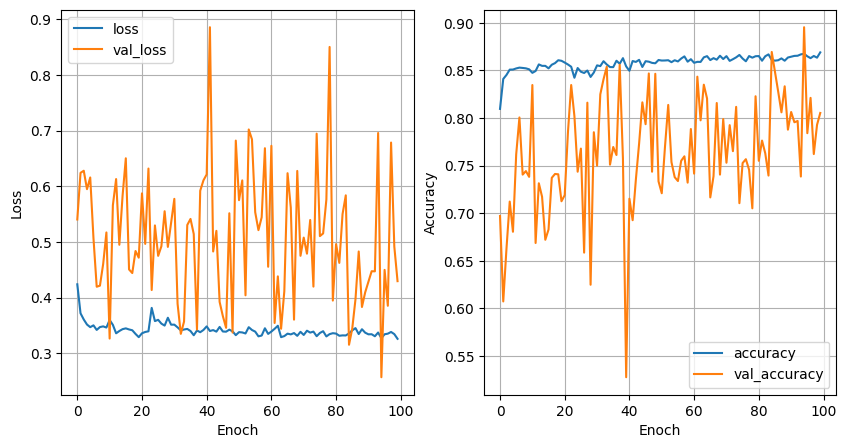

The number of nodes is 16, dropout probability is 0 The learning rate is 0.05 batch size 128


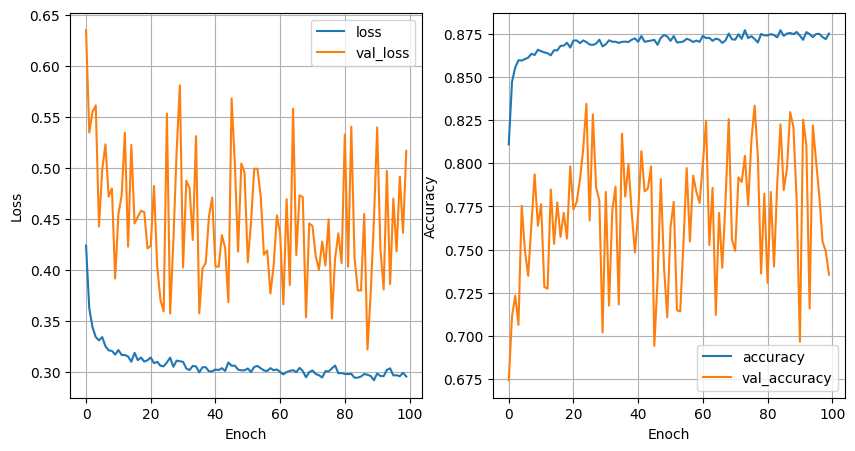

The number of nodes is 16, dropout probability is 0 The learning rate is 0.001 batch size 32


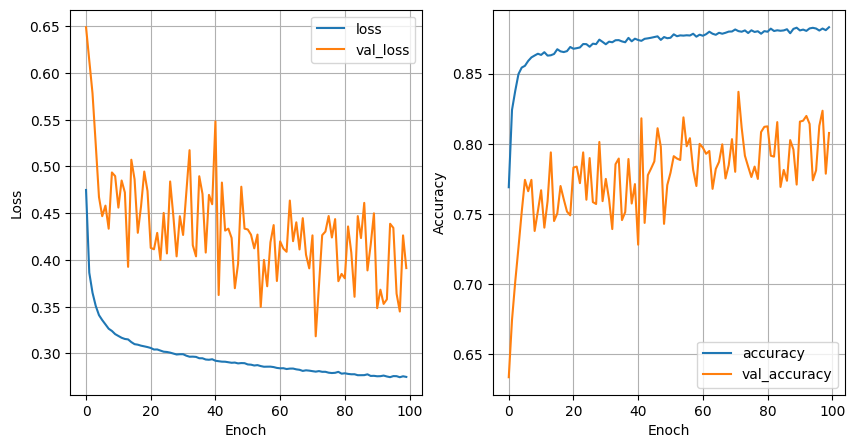

The number of nodes is 16, dropout probability is 0 The learning rate is 0.001 batch size 128


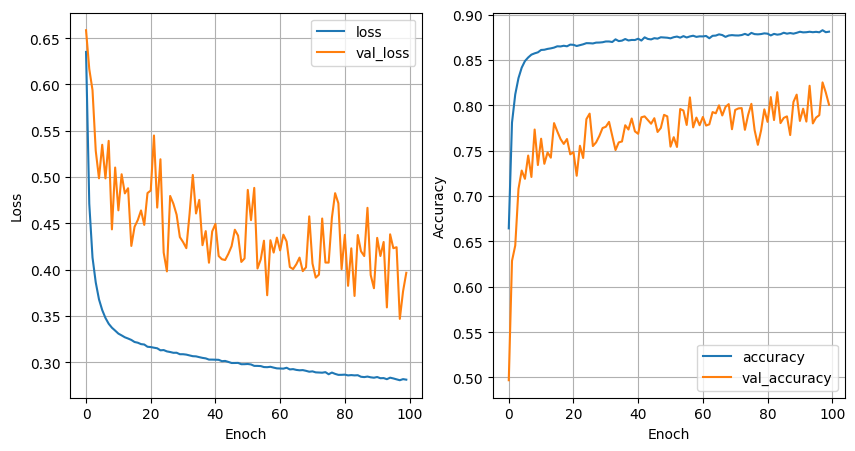

The number of nodes is 16, dropout probability is 0.2 The learning rate is 0.05 batch size 32


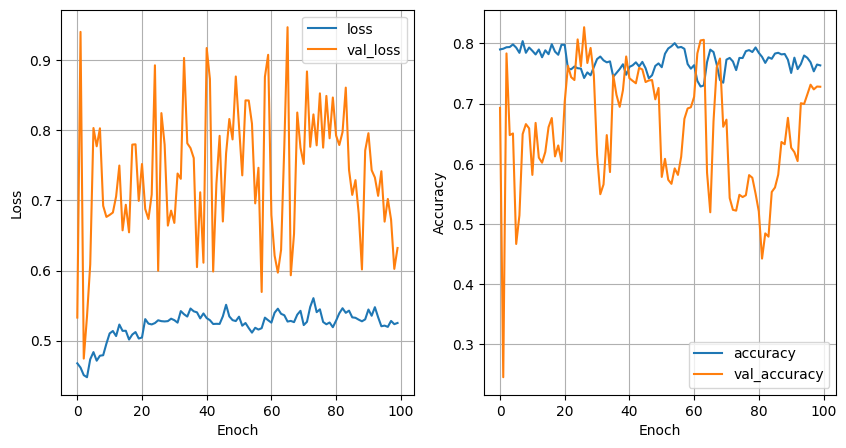

The number of nodes is 16, dropout probability is 0.2 The learning rate is 0.05 batch size 128


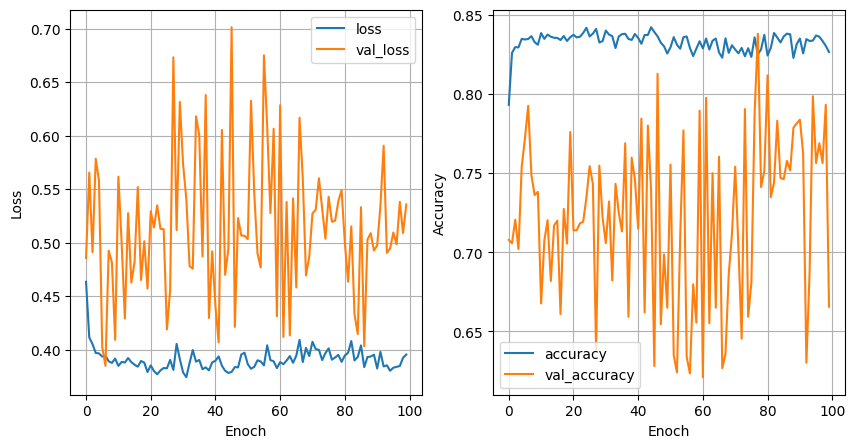

The number of nodes is 16, dropout probability is 0.2 The learning rate is 0.001 batch size 32


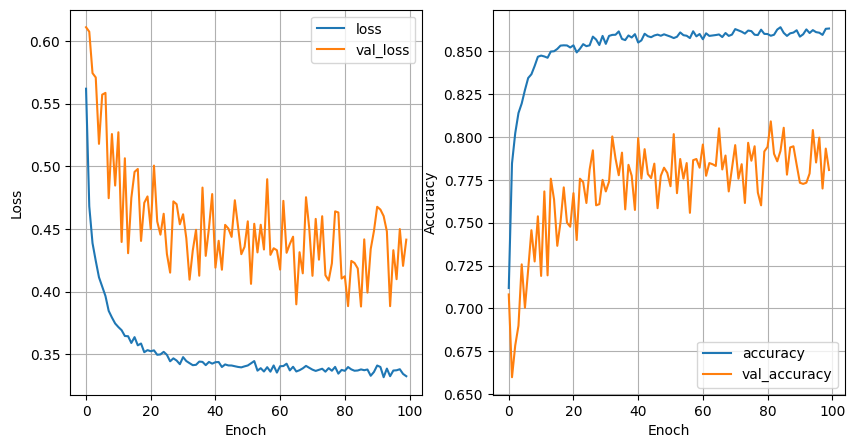

The number of nodes is 16, dropout probability is 0.2 The learning rate is 0.001 batch size 128


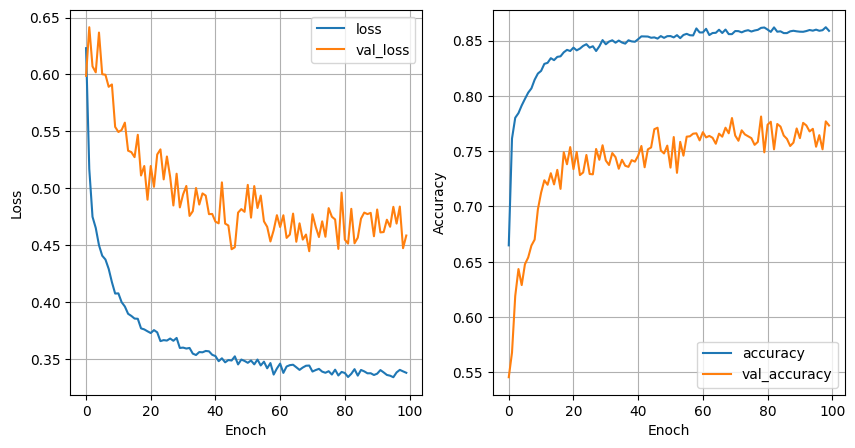

The number of nodes is 32, dropout probability is 0 The learning rate is 0.05 batch size 32


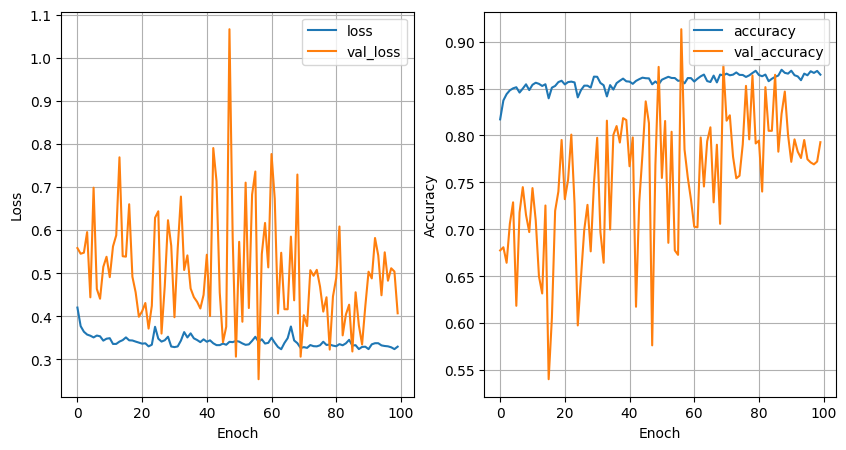

The number of nodes is 32, dropout probability is 0 The learning rate is 0.05 batch size 128


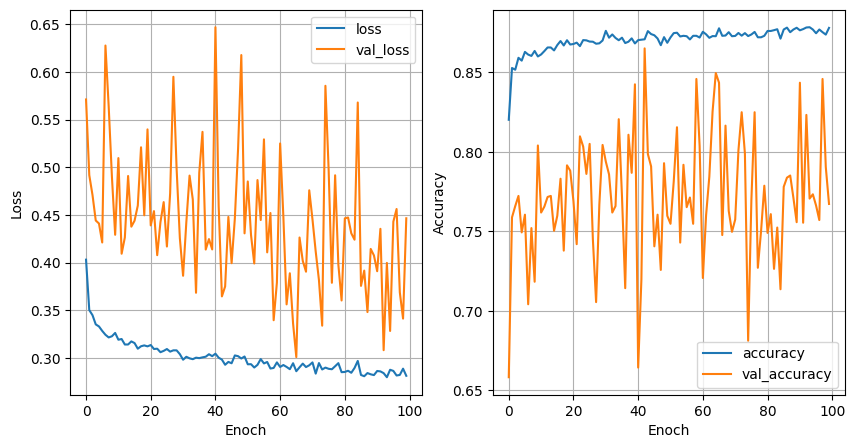

The number of nodes is 32, dropout probability is 0 The learning rate is 0.001 batch size 32


KeyboardInterrupt: 

In [84]:
epochs = 100
least_val = float('inf')
best_model = None
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.05, 0.001]:
      for batch_size in [32, 128]:
        print(f"The number of nodes is {num_nodes}, dropout probability is {dropout_prob} The learning rate is {lr} batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)


In [85]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1324
           1       0.89      0.89      0.89      2480

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804

